# The Effects of Selected Variables on ProsperRating
## by Opeyemi Rafiat Fasasi

## Investigation Overview

In this presentation, I wanted to find out the variables that can be used to predict the Prosper Rating of loans.The variables I would love to focus on are the LoanOriginalAmount, MonthlyLoanPayment and Term.  

## Dataset Overview

This data set contains information about loans, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The original dataset has 113937 rows and 81 columns. I reduced the number of rows to 84853, by selecting only loans that were originated after JUly 2009 and have a ProsperRating

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv')

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#have an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# data wrangling, selecting loans originated after July 2009 and removing loans with missing ProsperRating
df_09 = df[df['LoanOriginationDate'] >= '2009-07-01']
df_09 = df_09[~df_09['ProsperRating (numeric)'].isna()]

In [5]:
df_09.shape

(84853, 81)

## Distribution of LoanOriginalAmount

LoanOriginalAmount in the dataset take on a very large range of values, from  1000 at the lowest to 19,000 at the highest.The modal LoanoriginalAmount lies between 4000-5000. 

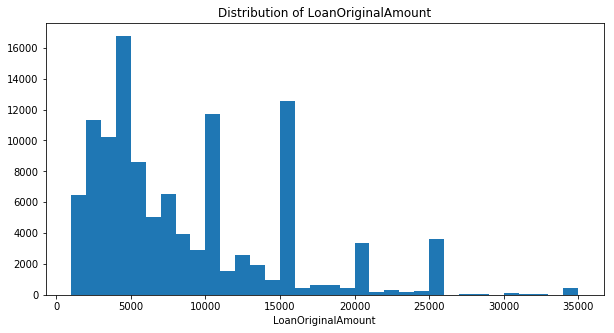

In [6]:
bins =  np.arange(1000, df['LoanOriginalAmount'].max()+1000, 1000)
plt.figure(figsize=[10,5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount')
plt.show();

## Distribution of Terms across Ratings

This looks at the distribution of current loan terms across different Prosper Ratings. It was observed that for all Proper ratings, a term of 36 months was the most represented with rating 6 having the most volume at over 7000. The short term loans of 12 months were the least represented across all Prosper Ratings.

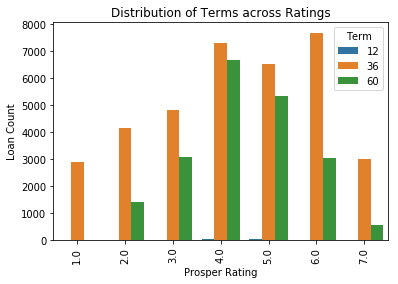

In [7]:
df_current = df_09[df_09['LoanStatus'] == 'Current']
sb.countplot(data = df_current,x =  'ProsperRating (numeric)',  hue = 'Term' )
plt.xticks(rotation=90)
plt.title('Distribution of Terms across Ratings')
plt.xlabel('Prosper Rating')
plt.ylabel('Loan Count');

## Distribution of MonthlyLoanPayment Across ProsperRatings
It was observed that in general, the higher the prosper rating, the higher the monthly Payment. However, there was a small dip in monthly payment at Prosper Rating 6 but this quickly recovered and showed an upward trend at ProperRating 7.

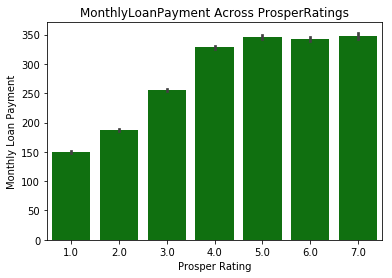

In [8]:
sb.barplot(data=df, x='ProsperRating (numeric)', y='MonthlyLoanPayment', color = 'green')
plt.title('MonthlyLoanPayment Across ProsperRatings')
plt.xlabel('Prosper Rating')
plt.ylabel('Monthly Loan Payment');

In [10]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_ProsperLoanData.ipynb --to slides

[NbConvertApp] Converting notebook Part_II_ProsperLoanData.ipynb to slides
[NbConvertApp] Writing 330191 bytes to Part_II_ProsperLoanData.slides.html
